#Machine Learning para classificação de texto

💻 [acessar este jupyter notebook no colab](https://colab.research.google.com/drive/1-we-t1CRszpwQUgYp3Mv8pEKlGtxlUWm?usp=sharing)

###Projeto de classificação de Emails em Spam e Não-Spam

Neste projeto, o objetivo foi classificar e-mails como spam ou não spam utilizando um conjunto de dados de e-mails rotulados em um arquivo CSV. Técnicas de Processamento de Linguagem Natural (PLN) para transformar os textos em vetores numéricos foram aplicadas. Em seguida, foi feito o treinamento de uma rede neural com esses vetores.

##Configurações iniciais

###Importação das bibliotecas

Dentra as bibliotecas utilizadas, temos `pandas` para carregar e manipular o conjunto de dados CSV, enquanto o `scikit-learn` nos fornece ferramentas indispensáveis, como `train_test_split` para dividir os dados em conjuntos de treinamento e teste, o `TfidfVectorizer` para transformar textos em vetores numéricos, e o `RandomForestClassifier` para treinar o modelo de classificação.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

###Conjunto de dados

A coluna *Message* contém os textos dos e-mails e coluna *Category* contém as classes de spam ou não spam.

In [ ]:
#importando arquivo com o conjunto de dados
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [ ]:
#verificar o arquivo CSV que foi importado
spam = pd.read_csv("spam.csv")
spam.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


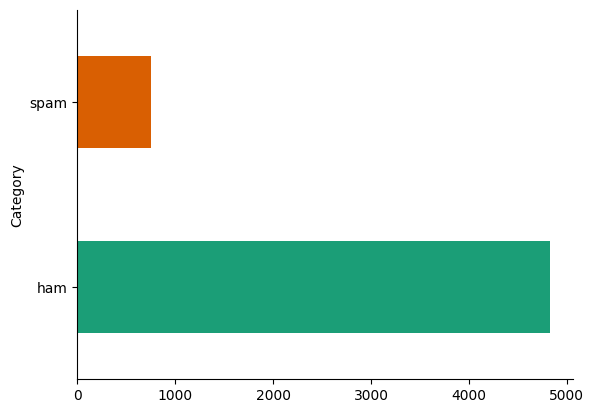

In [ ]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
spam.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#quantidade de mensagens | quantidade de colunas
spam.shape

(5572, 2)

In [ ]:
#verificar a quantidade de emails pertencentes a cada classe
spam['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

##Vetorização de texto

É necessário realizar a vetorização dos textos pois o modelo de ML não consegue reconhecer letras, portanto transformamos os dados em um formato "tabular" que pode ser reconhecido para o treinamento de Machine Learning.

In [ ]:
previ = spam['Message']
classe = spam['Category']

#vetorização
vetorizador = TfidfVectorizer()
previsores = vetorizador.fit_transform(previ)
print(previsores.shape)

# número de e-mails no conjunto de dados | número de características ou termos únicos extraídos dos e-mails após a vetorização

(5572, 8709)


In [ ]:
#visualizando a matriz gerada
print(vetorizador.get_feature_names_out()[10:100])

['0207' '02072069400' '02073162414' '02085076972' '021' '03' '04' '0430'
 '05' '050703' '0578' '06' '07' '07008009200' '07046744435' '07090201529'
 '07090298926' '07099833605' '07123456789' '0721072' '07732584351'
 '07734396839' '07742676969' '07753741225' '0776xxxxxxx' '07781482378'
 '07786200117' '077xxx' '078' '07801543489' '07808' '07808247860'
 '07808726822' '07815296484' '07821230901' '078498' '07880867867'
 '0789xxxxxxx' '07946746291' '0796xxxxxx' '07973788240' '07xxxxxxxxx' '08'
 '0800' '08000407165' '08000776320' '08000839402' '08000930705'
 '08000938767' '08001950382' '08002888812' '08002986030' '08002986906'
 '08002988890' '08006344447' '0808' '08081263000' '08081560665' '0825'
 '083' '0844' '08448350055' '08448714184' '0845' '08450542832'
 '08452810071' '08452810073' '08452810075over18' '0870' '08700435505150p'
 '08700469649' '08700621170150p' '08701213186' '08701237397' '08701417012'
 '08701417012150p' '0870141701216' '087016248' '08701752560'
 '087018728737' '087024118271

##Treinamento

###Divisão do conjunto de dados

O primeiro passo do treinamento é dividir o conjunto de dados em duas partes: "treinamento" e "teste". `X_treinamento` e `X_teste` são as partes dos dados de entrada para treinamento e teste, respectivamente. Já `y_treinamento` e `y_teste` são as partes das classes (spam ou não spam) para treinamento e teste, respectivamente.

* `test_size=0.3` indica que 30% dos dados serão usados para teste e 70% para treinamento.


###Visualizando o formato dos dados de Teste

emails no conjunto de teste | quantas características ou termos cada e-mail tem

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size = 0.3)

#visualizando o formato
X_teste.shape

(1672, 8709)

###Realizando o treinamento


O Random Forest ajuda na classificação de e-mails como spam ou não spam construindo múltiplas árvores de decisão, cada uma treinada com diferentes subconjuntos de dados. Ele combina as previsões dessas árvores por meio de votação da maioria, o que melhora a precisão e a robustez do modelo ao reduzir o risco de overfitting. Em resumo, o Random Forest utiliza a força coletiva de várias árvores para fazer previsões mais confiáveis.

* `n_estimators=500` define o número de árvores na floresta (500 árvores)

In [ ]:
floresta = RandomForestClassifier(n_estimators=500)
floresta.fit(X_treinamento, y_treinamento) #treina o modelo usando os dados de treinamento.

RandomForestClassifier(n_estimators=500)

In [ ]:
#utiliza o modelo treinado floresta para fazer previsões nos dados de teste X_teste

previsoes = floresta.predict(X_teste)
print(previsoes)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


Matriz de Confusão: É uma tabela que mostra a performance do modelo ao comparar as previsões feitas com os rótulos reais.


* TN (True Negative): E-mails corretamente classificados como não spam.
* FP (False Positive): E-mails erroneamente classificados como spam.
* FN (False Negative): E-mails erroneamente classificados como não spam.
* TP (True Positive): E-mails corretamente classificados como spam.

|     | Não Spam | Spam   |
|-----|----------|--------|
| Não Spam | TN     | FP   |
| Spam   | FN     | TP     |



In [ ]:
#gerando a matriz de confusão

print(confusion_matrix(y_teste, previsoes))

[[1461    0]
 [  38  173]]


In [ ]:
#calculo da precisão do modelo (percentual de previsões corretas).
print(accuracy_score(y_teste, previsoes))

0.9772727272727273


In [ ]:
#gera um relatório de classificação com métricas detalhadas, incluindo precisão, recall e F1-score para cada classe.
print(metrics.classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1461
        spam       1.00      0.82      0.90       211

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.98      1672





---


###Testando o modelo treinado

Para testar o modelo treinado com uma frase como um exemplo de e-mail de spam ou não spam, o código abaixo pode ser executado utilizando o modelo de Random Forest já treinado.

In [ ]:
#exemplo de frase para teste

novo_email = ["Good morning, I believe there was a mistake in the previous email, the meeting remains at 10:00 am."]

In [ ]:
#vetorização da nova frase usando o mesmo vetorizador usado no treinamento
novo_email_vetorizado = vetorizador.transform(novo_email)

#fazendo a previsão com o modelo treinado
previsao_novo_email = floresta.predict(novo_email_vetorizado)

In [ ]:
#exibindo a previsão
print(previsao_novo_email)


['ham']
